# Modelo de Prediccion

🍎 Conectando con Wall Street...
✅ Inteligencia Artificial Entrenada.


/Users/axelalexis/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/axelalexis/Desktop/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


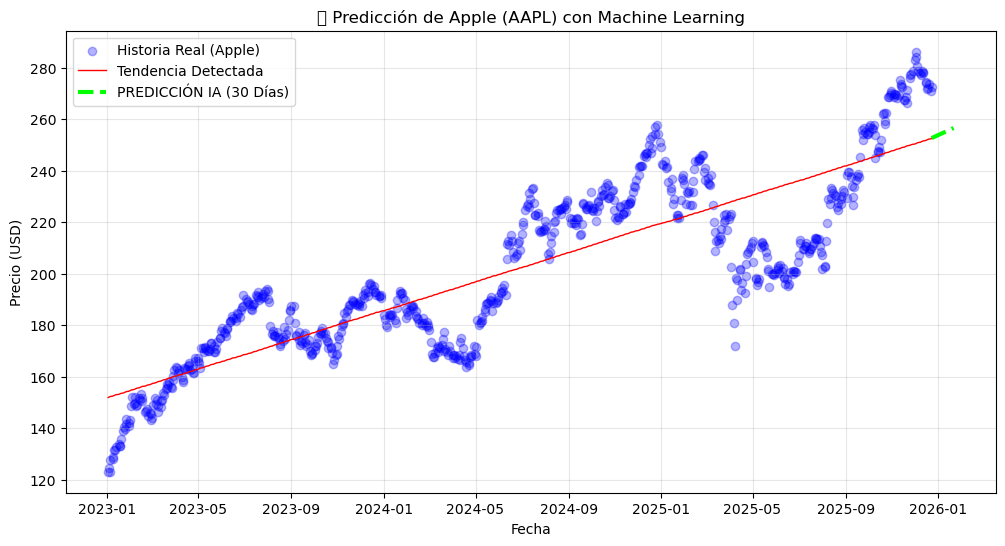

💰 La IA predice que Apple cerrará en aprox: $256.57 dentro de un mes.


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. BAJAR DATOS DE APPLE (Desde 2023 para ver la tendencia reciente)
print("🍎 Conectando con Wall Street...")
df = yf.download('AAPL', start='2023-01-01', progress=False)

# Limpieza técnica (por si yfinance descarga formato complejo)
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)
    
df = df[['Close']].dropna().reset_index()

# 2. PREPARAR LA INTELIGENCIA ARTIFICIAL
# La IA necesita números, no fechas. Convertimos fechas a "Día 1, Día 2..."
df['Dia_Numero'] = df.index.values

X = df[['Dia_Numero']]  # Lo que la IA estudia (El tiempo)
y = df['Close']         # Lo que la IA debe aprender (El precio)

# 3. ENTRENAMIENTO (Aquí la máquina aprende)
modelo = LinearRegression()
modelo.fit(X, y)

print(f"✅ Inteligencia Artificial Entrenada.")

# 4. PREDECIR EL FUTURO (Próximos 30 días)
ultimo_dia_conocido = df['Dia_Numero'].iloc[-1]
# Creamos los números de los días futuros
dias_futuros = np.array(range(ultimo_dia_conocido + 1, ultimo_dia_conocido + 31)).reshape(-1, 1)

# ¡La magia! La IA calcula los precios
prediccion = modelo.predict(dias_futuros)

# 5. VISUALIZACIÓN DEL RESULTADO
plt.figure(figsize=(12, 6))

# Datos Reales (Pasado)
plt.scatter(df['Date'], df['Close'], color='blue', alpha=0.3, label='Historia Real (Apple)')

# Línea de Tendencia (Lo que aprendió la IA)
plt.plot(df['Date'], modelo.predict(X), color='red', linewidth=1, label='Tendencia Detectada')

# PREDICCIÓN (Futuro)
fechas_futuras = pd.date_range(start=df['Date'].iloc[-1], periods=30, freq='D')
plt.plot(fechas_futuras, prediccion, color='lime', linewidth=3, linestyle='--', label='PREDICCIÓN IA (30 Días)')

plt.title('🤖 Predicción de Apple (AAPL) con Machine Learning')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"💰 La IA predice que Apple cerrará en aprox: ${prediccion[-1]:.2f} dentro de un mes.")